In [1]:
from SimilarityClustering import SimilarityClustering
import articles_data

from gensim.models import Word2Vec
import numpy as np
import pandas as pd
import cnouns as cn
from pymongo import MongoClient
import datetime

%matplotlib inline

In [2]:
client = MongoClient('mongodb://localhost:27017/somanews')
client.somanews.authenticate('ssomanews', 'ssomanews1029')
db = client.get_database('somanews')

crawled_collection = db.get_collection('crawledArticles')
clusters_collection = db.get_collection('bclusters')
articles_collection = db.get_collection('barticles')

In [3]:
catelist_path = '../datastore/category2.p'
# w2v_src_dir = "../datastore/w2v_src"
# w2v_path = "../datastore/sejongcorpus_w2v2.p"

w2v_src_dir = "../datastore/w2v_src3"
w2v_path = "../datastore/sejongcorpus_w2v3_2.p"

corpus_path = "../datastore/corpus2.p"
# target_date = datetime.datetime(2016, 11, 4)
target_time = datetime.datetime.now()
prefix = int("%.2d%.2d"%(target_time.month, target_time.day))
prefix_str = "%d_04" % prefix
prefix_str

'1115_04'

In [4]:
dicts = [u'새누리', u'새누리당', u'더민주', u'더민주당', u'최순실', u'박대통령', u'국회의장', u'야권의요구', u'정기국회', u'참여정부']
def tokenizer(inp_str):
#     return cn.pos_tags(inp_str)
   return cn.custom_pos_tags(inp_str, dicts)

# Doc2Vec

In [ ]:
# size = articles_data.makeDataset(crawled_collection, w2v_src_dir, corpus_path, tokenizer=tokenizer)
# print size

In [ ]:
# articles_data.trainWord2Vec(w2v_src_dir, w2v_path, size)

# Model

In [ ]:
train_df = articles_data.find_recent_articles(crawled_collection, catelist_path, target_time)
sc = SimilarityClustering()
sc.train("cate", w2v_path, train_df, path="../datastore", prefix=prefix_str, tokenizer=tokenizer,
            threshold=0.8, 
            cnt_threshold=2, 
            repeat=1,
            model_name='dbow+dmm')

In [5]:
sc = SimilarityClustering.load(path="../datastore", prefix=prefix_str, model_name='dbow+dmm', only_d2v=True)

In [6]:
sc.select_model('dbow+dmm')
sc.cluster_train("cate", path="../datastore", prefix=prefix_str, repeat=1, threshold=0.7)

Calc similarity:   0%|          | 0/340725 [00:00<?, ?it/s]

Similarity cate clustering.....

Clustering category : 정치
similarity_clustering - threshold:0.700000
Iter 1/1
Calculate similarity. size:826


Clustering:  25%|██▌       | 85/340 [00:00<00:00, 843.89it/s]

Sorting
Clustering - size:340


Clustering: 100%|██████████| 340/340 [00:00<00:00, 844.74it/s]


Done in 95.459s.

Clustering category : 사회
similarity_clustering - threshold:0.700000
Iter 1/1
Calculate similarity. size:1064


Clustering:  32%|███▏      | 160/495 [00:00<00:00, 801.98it/s]

Sorting
Clustering - size:495


Calc similarity:   0%|          | 372/136503 [00:00<00:36, 3712.87it/s]

Done in 161.856s.

Clustering category : 경제
similarity_clustering - threshold:0.700000
Iter 1/1
Calculate similarity. size:523


Clustering:  57%|█████▋    | 169/296 [00:00<00:00, 841.69it/s]

Sorting
Clustering - size:296


Calc similarity:  37%|███▋      | 370/990 [00:00<00:00, 3695.61it/s]

Done in 38.155s.

Clustering category : 과학
similarity_clustering - threshold:0.700000
Iter 1/1
Calculate similarity. size:45


Calc similarity: 100%|██████████| 990/990 [00:00<00:00, 3683.53it/s]
Clustering: 0it [00:00, ?it/s]


Sorting
Clustering - size:0
Done in 0.296s.
Complete to similarity clustering.
total: 1808 , size_1: 1577 , countby: 14
distance: 7002.96401024
variance: 3.27884406684
similarity: 73.2407145838
cohesion: 23.3579837948
in_threshold: 180.0
time_mean: 5091318.7565
time_v: 38210280921.9
portion: 0.118388934093


# Save

In [7]:
sc.save(path="../datastore", prefix=prefix_str)

Complete to save model.


In [8]:
calced_clusters = sc.save_to_db(prefix, clusters_collection, articles_collection, target_time, test=True)

# Test

In [9]:
sc.iner_score(threshold=0.7, cnt_threshold=10)

total: 1808 , size_1: 1577 , countby: 14
distance: 7002.96401024
variance: 3.27884406684
similarity: 73.2407145838
cohesion: 7.0018168212
in_threshold: 54.0
time_mean: 5091444.64249
time_v: 38210280921.9
portion: 0.118388934093


1
     cluster  cnt   portion  in_threshold  in_ratio      time_mean  \
107      198   12  0.004882             5  0.416667  339095.543334   

           time_v  distance  variance  similarity  cohesion  
107  9.171229e+09  2.440928  0.203411    0.798137  0.798163  



0.933528721333 1611 올해 수능 한파 없다
0.868251204491 1316 [날씨] 아침 최저기온 영상 1도…오후에 전국 비소식
0.814568579197 864 전국 대부분 아침 영하로 떨어져…서울 -2도
0.809461832047 2357 15일부터 다시 추위, 강풍에 체감온도도 뚝
0.808662295341 2457 [날씨] 전국 구름 많고 미세먼지 심해요…남부·제주는 비
0.798828661442 1739 [날씨] 중부지방 아침에 눈·비…미세먼지 ‘나쁨’
0.798110067844 1044 서울 오늘 아침 영하 3.2도…올 가을 들어 가장 추웠다
0.790826797485 198 오늘내일 비 온 뒤 영하권 ‘뚝’…10일 낮부터 풀릴 듯
0.760805249214 2148 [날씨]전국 오후부터 흐려져···미세먼지 보통·밤 늦게 비 조금
0.739784240723 934 한파주의보 전국 확대… 10일까지 초겨울 추위
0.737502396107 118 7일 비에 젖은 입동… 8일부터 다시 쌀쌀
0.717311739922 512 서울 아침기온 하루새 10도 뚝… 10일까지 반짝 추위


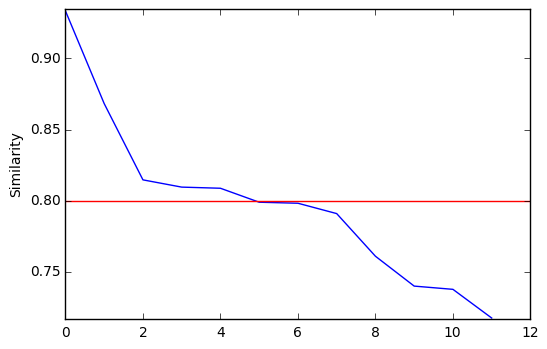

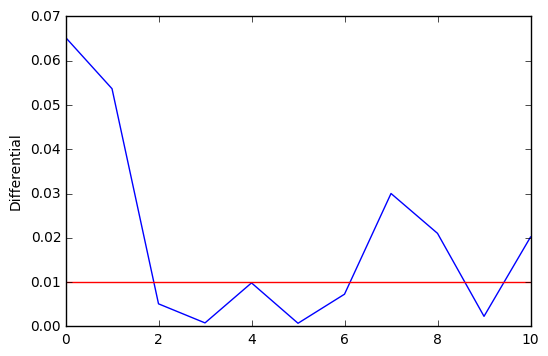

None
------------------------------------------------------------
2
     cluster  cnt   portion  in_threshold  in_ratio      time_mean  \
498      646   15  0.006103             3       0.2  278226.543334   

           time_v  distance  variance  similarity  cohesion  
498  4.455368e+09   3.17005  0.211337    0.783418  0.452437  



0.942162454128 2305 국방부, 한일군사정보협정 내일 가서명 ‘반대여론 묵살’
0.842972159386 794 한일 군사정보협정 가속…야 “어수선한 틈 밀어붙이기” 반발
0.821858227253 2111 韓·日 군사정보보호협정 내주 가서명
0.795162498951 1717 “한·일 군사협정 강행 땐 국방장관 해임건의”
0.79367852211 2399 이 시국에…정부, 한·일군사협정 오늘 가서명 강행
0.781820118427 2057 한일군사정보협정 11월 셋째주초 가서명
0.775902509689 646 정부, '최순실 게이트' 틈타 한일군사정보보호협청 체결 서둘러
0.769680559635 2043 한·일 군사정보협정 ‘군사작전’ 하듯
0.759884119034 832 한·일 군사정보협정 ‘속전속결’ 체결 강행
0.759116828442 1231 국방부 “한일 군사정보협정, 주요 내용 의견 일치”
0.756894528866 2005 국방부 “다음주 한-일 정보협정 가서명”…국정 혼란 와중에 ‘강행’
0.754637360573 1890 ‘한·일 정보협정’ 법제처에 심사 의뢰 국방부 “다음주 협정 가서명”
0.753485679626 631 이 와중에…국방부, ‘한일 군사협정’ 2차 협상도 강행
0.741231560707 981 韓·日 군사협정 서두르는

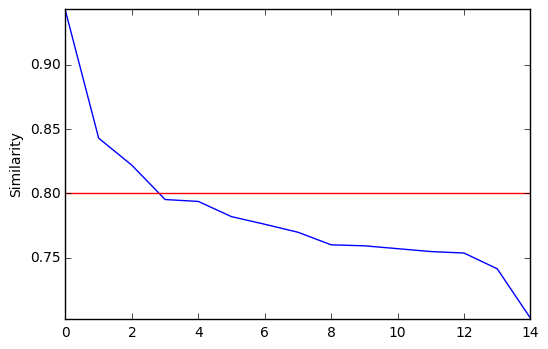

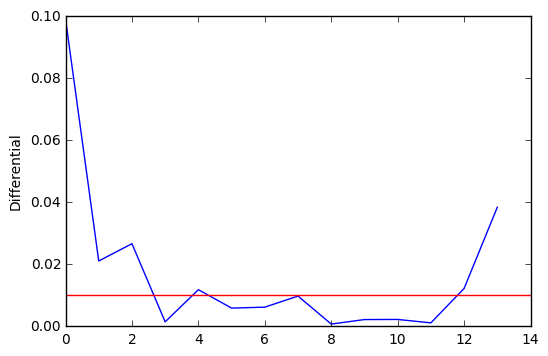

None
------------------------------------------------------------
3
    cluster  cnt   portion  in_threshold  in_ratio      time_mean  \
30     1433   14  0.005696             4  0.285714  486141.971905   

          time_v  distance  variance  similarity  cohesion  
30  1.473571e+09  2.989146   0.21351    0.778014  0.592988  



0.926818430424 1441 [알립니다] 캠브리지 A레벨 준비과정 설명회
0.877227783203 41 [알립니다] ‘의사 체험 박람회’ 구미·천안 개최 外
0.856112122536 1438 [알립니다] 유엔 대사처럼 연설해보자!  제5회 MUN 리더스 서밋
0.802143871784 34 [알립니다] 미국 탑클래스 관리형 유학 外
0.785255253315 39 [맛있는 교육정보] 코딩교육 정규과정 수강생 모집 外
0.785051167011 1436 [알립니다] 2016 의사 직업 체험 박람회, 구미·천안 개최 외
0.762397766113 42 학생 잠재력 평가로 전략 수립·맞춤형 진학 계획 세운다
0.754120469093 376 11월 8일 함께하는 교육 정보
0.748315155506 1440 [알립니다] 2017학년도 1·9월 학기 美 국무부 교환학생 모집
0.741723537445 35 [알립니다] '앞서가는 대입설명회' 개최
0.729815244675 1432 [알립니다] 美·英 명문 사립학교 정규수업 참여… 초·중등 겨울캠프 모집 외
0.724429726601 43 [알립니다] 미국·영국 겨울방학 캠프 外
0.711377978325 1433 [알립니다] 2017학년도 1·9월 학기 美 탑클래스 관리형 유학 모집
0.68740105629 33 현지 친구

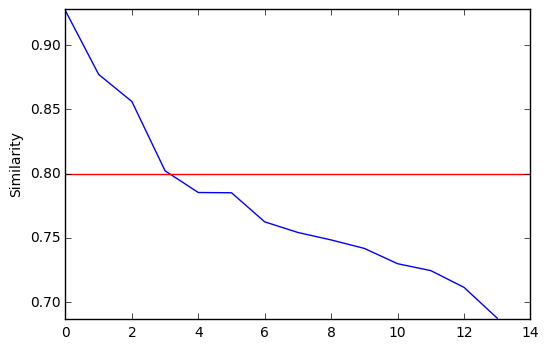

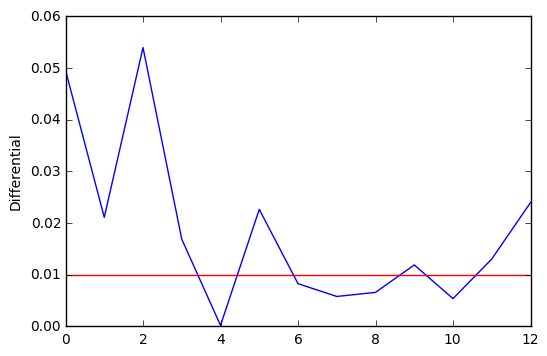

None
------------------------------------------------------------
4
     cluster  cnt   portion  in_threshold  in_ratio      time_mean  \
121      952   12  0.004882             3      0.25  455345.460001   

           time_v  distance  variance  similarity  cohesion  
121  1.155428e+08  2.590143  0.215845    0.770285   0.43556  



0.961981356144 993 검찰, 삼성 미래전략실 압수수색
0.863510608673 967 [단독]차은택 “안종범, 조금 아는 사이”… 귀국 즉시 체포
0.806789398193 863 삼성의 '급소' 찌른 검찰, 정유라 35억 특혜 정조준
0.789412736893 952 檢, 삼성그룹 컨트롤타워 정조준… 삼성측 “우리도 최순실에 속았다”
0.770213961601 757 [단독] 삼성, 정유라 ‘독일 승마’에 120억 넘게 지원 의혹
0.753041684628 529 [단독]檢, 최순실에 알선수재혐의도 적용 검토
0.751608490944 853 [박근혜·최순실 게이트]돌아온 차은택 “안종범 조금 알고 있다”
0.740694642067 1016 [박근혜·최순실 게이트]삼성, 승마협회 손에 쥐고 ‘정유라, 제2 김연아 만들기’ 가동
0.720063209534 828 [박근혜·최순실 게이트]차은택, 중국 도피 한 달여 만에 귀국
0.704566836357 990 40여일만에 귀국한 차은택 "안종범 前수석 조금 알고있다"
0.701579034328 955 차은택, 장차관 인사 개입 묻자 “죄송합니다”
0.679959475994 134 “박상진 삼성전자 사장, 獨서 최순실 만나 자금지원 논의”


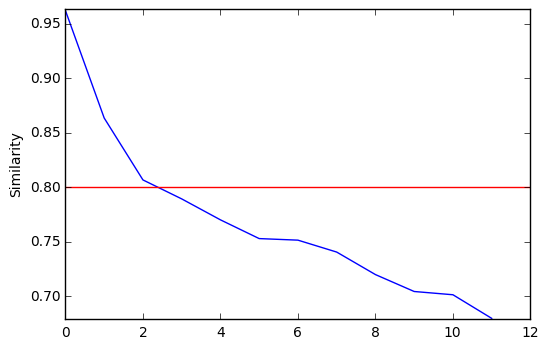

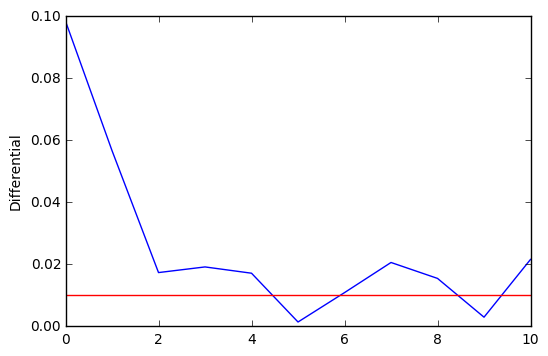

None
------------------------------------------------------------
5
    cluster  cnt   portion  in_threshold  in_ratio      time_mean  \
37     1258   16  0.006509             5    0.3125  456146.668334   

          time_v  distance  variance  similarity  cohesion  
37  1.813400e+09   3.49727  0.218579    0.767194  0.713977  



0.935038566589 1660 부산도시철도 차량기지에서 감전사고···2명 화상
0.876093327999 1481 술 취한 20대 고속도로서 화물차 추돌…1명 숨져
0.850903332233 1227 우애좋은 고령 4남매 여행길에서 교통사고 참변
0.815326809883 1258 남해고속도로 고속버스 추돌 35명 부상
0.813499987125 1278 우애깊던 ‘황혼 4남매’ 전국 여행길 참변
0.794897437096 1154 남해고속도로 승용차·트레일러 추돌 2명 사망·3명 부상
0.751844406128 171 모텔에 걸려 있던 거울이 탐나서 ‘슬쩍’
0.743909776211 517 경부고속도 관광버스 사고 유발… 끼어든 車 70대 운전자 긴급체포
0.738083779812 416 ‘관광버스 전도사고’ 끼어들기 70대 운전자 붙잡아
0.726571977139 619 경찰, 경부고속도로 관광버스 사고 유발 운전자 구속영장 신청
0.726303160191 358 ‘주유소에서 하마터면 큰불 날 뻔’…후진하는 탱크로리에 주유기 넘어지며 화재
0.726282894611 613 경찰 “관광버스 사망 사고 유발 70대 영장 신청”
0.718777894974 123 끼어든 車 피하다… 정원초과 관광버스 또 참사
0.715054631233 365 관광버스 사고유발 70대 운전자

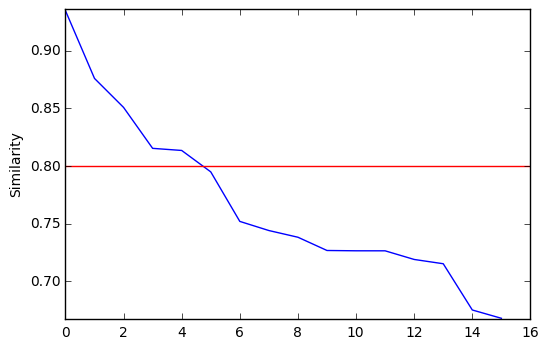

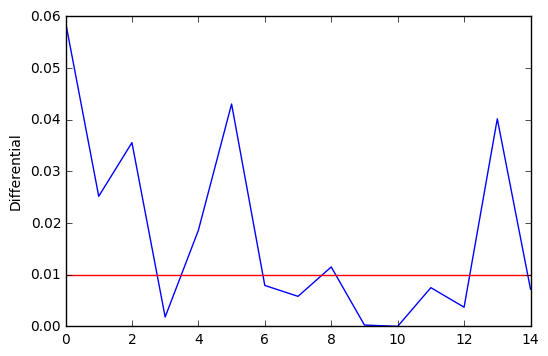

None
------------------------------------------------------------
6
   cluster  cnt   portion  in_threshold  in_ratio      time_mean  \
2     1326   16  0.006509             3    0.1875  289714.293334   

         time_v  distance  variance  similarity  cohesion  
2  4.526052e+09    3.6256    0.2266     0.75042  0.404189  



0.923272192478 2396 가스·난방 원격제어··· 현대건설 ‘힐스테이트평택 3차’ 분양
0.882508516312 1884 김천센트럴자이 11일 견본주택 열고 분양
0.872570693493 2388 3면 개방형 혁신평면 아파트, 김천센트럴자이 930가구 공급
0.764558494091 1756 [화제의 분양현장]오산 유탑 유블레스
0.760953009129 1752 [화제의 분양현장]목동파크자이
0.752550840378 1753 [화제의 분양현장]영통 아이파크 캐슬
0.75224840641 1322 [화제의 분양현장]청라 한신더휴 커낼웨이
0.744397222996 1750 [화제의 분양현장]평택 ‘소사벌 더샵’
0.722063183784 1749 [화제의 분양현장]중동 센트럴파크 푸르지오
0.715288281441 1326 [화제의 분양현장]여의 샛강 에코시티
0.71221613884 1329 [화제의 분양현장]제주 ‘중문 오션 클라우드’
0.708035767078 1751 [화제의 분양현장]힐스테이트 평택 3차
0.70358979702 1748 [화제의 분양현장]강남센터뷰
0.697373270988 2 서해와 인천대교 거실에서 한눈에…최고 38층 3100세대 송도의 새 랜드마크로
0.686445474625 1327 [화제의 분양현장]가평 헤렌하임 3·4차
0.6086

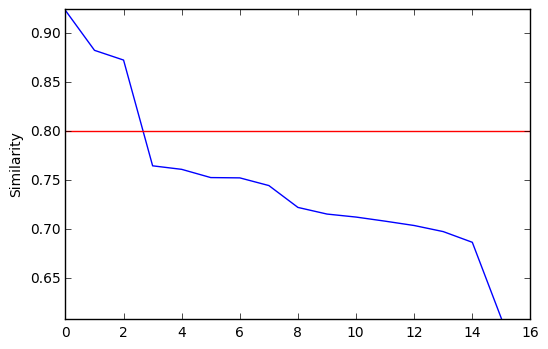

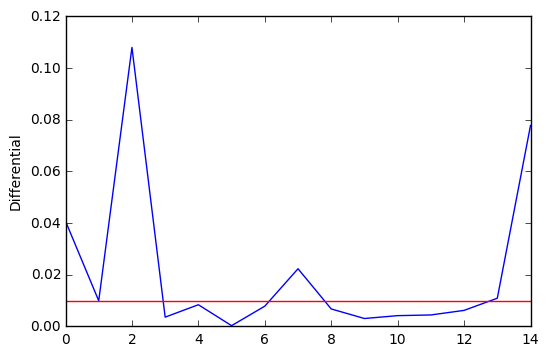

None
------------------------------------------------------------
7
   cluster  cnt   portion  in_threshold  in_ratio      time_mean  \
9     2412   30  0.012205             3       0.1  263584.276667   

         time_v  distance  variance  similarity  cohesion  
9  2.182379e+09  7.084248  0.236142    0.733423  0.379072  



0.948941588402 2448 [100만 촛불]새누리 비주류 “박 대통령 탄핵” 공개 거론
0.817258954048 2435 [100만 촛불]한 발 더 나간 비박계 “질서 있는 퇴진 거부 땐 탄핵의 길”
0.803150594234 2402 이정현 “중립내각 출범하면 사퇴…내년 1월21일 전대”
0.788528859615 2406 “박대통령 모두 내려놔야” 새누리서도 탄핵·당 해체론
0.777364194393 392 “헌법정신은 탄핵이지만” 금기어 쏟아낸 비박…위기의 새누리
0.771728038788 2366 김무성 “박 대통령, 탄핵의 길로 가야”
0.765560567379 2440 [100만 촛불]민주당 내서도 커지는 ‘퇴진론’…딜레마에 빠진 ‘손 떼라’
0.760521709919 2374 [속보]與 이정현, "내년 1월 21일 조기전대 열어 새 당 대표 선출"
0.755994915962 2353 김무성, "박 대통령 국민이름으로 탄핵의 길로 가야"
0.74702590704 440 [박근혜·최순실 게이트]‘탈당 카드’ 꺼낸 비박, ‘버티기’ 맞선 친박…‘파국’ 치닫나
0.742176413536 1237 새누리 비주류 “지도부 사퇴하고 당 해체…재창당”
0.739333629608 2412 ‘대통령 퇴진’으로 기운 야, 하야 로드맵 쏟아내
0.725368142128 537 친박 

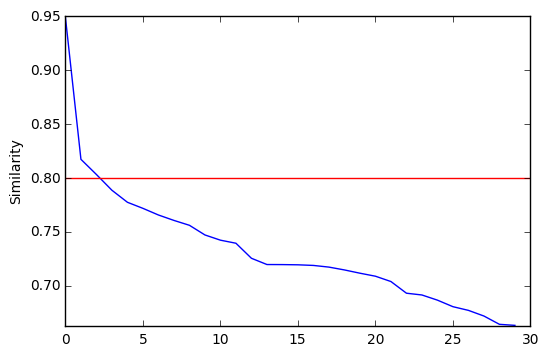

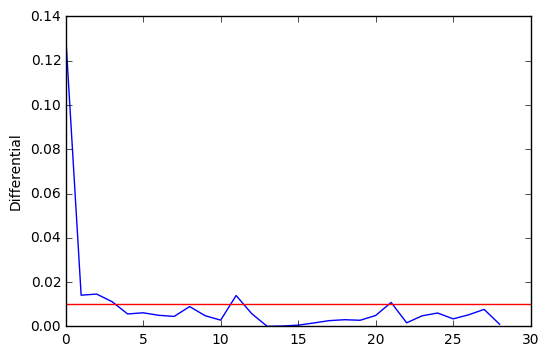

None
------------------------------------------------------------
8
     cluster  cnt   portion  in_threshold  in_ratio      time_mean  \
299      970   18  0.007323             5  0.277778  474470.210001   

           time_v  distance  variance  similarity  cohesion  
299  6.008850e+08   4.36034  0.242241     0.71519  0.600567  



0.936747789383 1234 2선후퇴 귀막은 채…청 “대통령과 새 총리가 협의”
0.832114756107 970 朴대통령 “국회 추천 총리가 내각 통할” 野 “권한 모호… 2선후퇴 먼저” 또 거부
0.822292804718 963 野, 정국수습 대안없이… “대통령이 국회상륙 기습작전”
0.811368048191 971 [NEWS&VIEW] "총리 권한 분명히 매듭짓고, 빨리 뽑아라"
0.80879753828 972 朴대통령이 국회로 던진 공… 野 "전권이양 약속하면 총리 협상"
0.772348105907 836 [박근혜·최순실 게이트]‘손 안 뗀다’는 대통령…야 ‘공수표’ 거부 “2선 퇴진” 못 박기
0.746702134609 792 ‘총리’만 내려놓고 국정은 쥐겠다는 대통령
0.729044556618 840 [박근혜·최순실 게이트]한 발 물러선 ‘모양새’ 취했지만…‘핵심 사안’엔 끝내 침묵
0.722273528576 540 정국수습 메시지 급한데… 종교계에 ‘邪敎’ 해명한 朴대통령
0.690925836563 844 [박근혜·최순실 게이트]‘2선 퇴진’엔 입 다문 박 대통령
0.683766841888 645 박대통령 “국회 추천 총리, 내각 통할하도록 하겠다”
0.672810554504 635 박 대통령 총리 지명 사실상 철회..."여야 합의로 좋은 분 추천하면

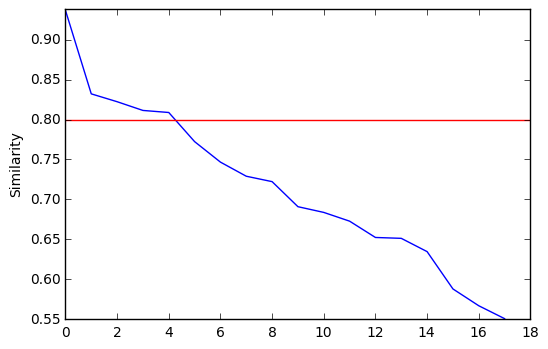

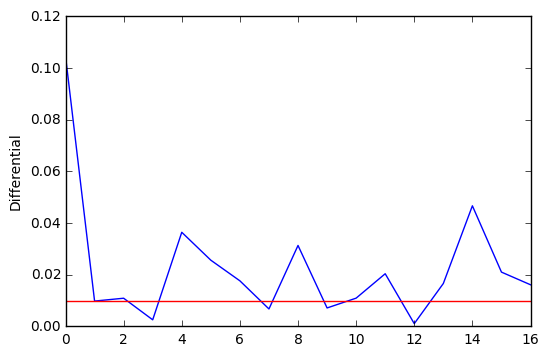

None
------------------------------------------------------------
9
     cluster  cnt   portion  in_threshold  in_ratio     time_mean  \
227      677   18  0.007323             3  0.166667  465223.09889   

           time_v  distance  variance  similarity  cohesion  
227  8.365762e+08  4.369186  0.242733    0.714536  0.359282  



0.944658458233 1020 [선택 2016 - 미국 대선]클린턴 “오늘 역사를 만들자”
0.842010319233 822 [선택 2016 - 미국 대선]“증오 반대하려 클린턴 선택” “변화를 위해 트럼프에 투표”
0.820712387562 1017 [선택 2016 - 미국 대선]막판 유세 ‘둘이 합쳐 7000㎞’…마지막까지 전력 질주
0.77694195509 1018 [선택 2016 - 미국 대선]‘유리천장’ 뚫을까…‘설마’가  현실 될까
0.758607268333 686 클린턴 “내가 이기면 트럼프에게 전화하겠다”...두 후보, 마지막날까지 치열한 유세전
0.753802835941 1007 클린턴 "벽이 아닌 다리를 놓자" 트럼프 "부패한 정치 시스템 깨자"
0.742099702358 677 첫 여성 대통령 탄생 눈앞...미국 오늘 대선 실시
0.736707448959 819 [선택 2016 - 미국 대선]출발이 좋은 클린턴 ‘첫 개표’ 승리
0.713177025318 689 [미 대선]클린턴, 첫 투표지서 4대 2로 승리
0.710123360157 723 미국 첫 투·개표 ‘딕스빌노치’의 민심은 클린턴을 선택했다
0.700415372849 578 오늘 0시 투표 시작
0.666477262974 299 미국 대선, 여기서 승부가 결정된다
0.666357755661

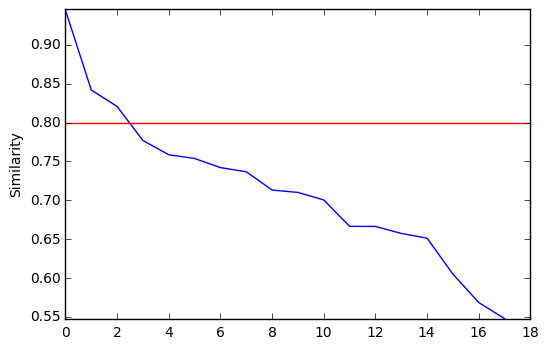

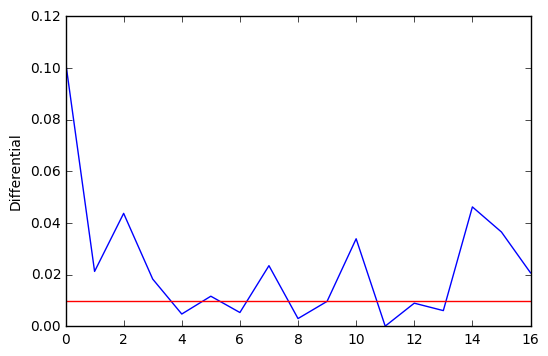

None
------------------------------------------------------------
10
     cluster  cnt   portion  in_threshold  in_ratio      time_mean  \
263      526   18  0.007323             5  0.277778  329006.876667   

           time_v  distance  variance  similarity  cohesion  
263  1.409740e+09  4.382624  0.243479    0.712666  0.595405  



0.888266205788 2030 공식 반응 않는 북…조선신보 “트럼프, 오바마에서 교훈 찾아라”
0.843831598759 1681 노동신문, 트럼프 겨냥 “새 행정부는 핵강국 상대해야”
0.831336677074 2029 [트럼프 시대의 한반도](하) 불확실해서 불안…북한에 대해선 ‘백지’
0.815274596214 1822 “사드 배치 뒤집을 가능성 거의 없어”
0.80733191967 1478 北 "美 새 행정부, 핵강국 상대해야" … "'전략적 인내'는 '전략적 패배'로 끝나"
0.758048832417 1616 ‘트럼프’와 한미동맹 강화…박근혜, 협상에서 트럼프 이길 수 있을까?
0.753328621387 1824 “트럼프, 북핵 문제는 후순위에… 김정은 숨통 터줄 우려”
0.737030208111 1181 트럼프 북핵 문제 ‘중국 활용론’ 주장
0.73028331995 1418 당장 주한美軍 비용 문제 부상… '韓美동맹 뼈대' 흔들릴 수도
0.723089635372 1390 “북핵 대응, 모든 옵션 배제 안해” 공언… 對中 압박도 거셀 듯
0.716872155666 2113 분담금 협상, 트럼프 뜻대로 안되면 美軍 감축 카드 꺼낼 듯
0.706476092339 1263 ‘MD 무용론’ 밝힌 트럼프…한반도 사드 재검토되나
0.701247870922 1823

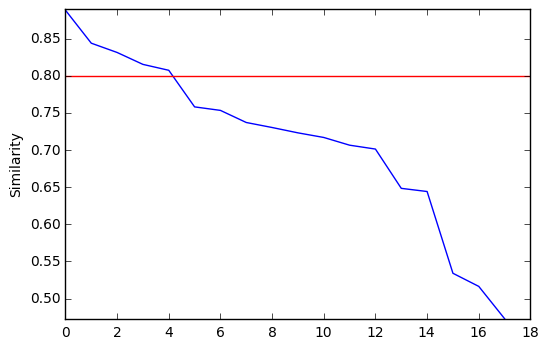

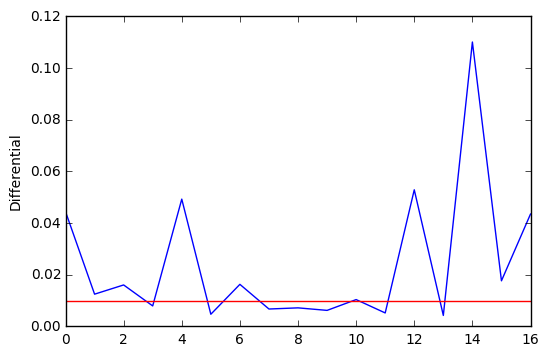

None
------------------------------------------------------------
11
     cluster  cnt   portion  in_threshold  in_ratio      time_mean  \
117      738   37  0.015053             6  0.162162  356482.354145   

           time_v  distance  variance  similarity  cohesion  
117  9.428030e+08  9.097199   0.24587    0.711145  0.706028  



0.885673880577 1985 이주열 한은 총재 “경제 성장경로 불확실성 높아져”
0.868114769459 1483 ‘트럼프 시대’ 정부부처 수장들의 생각은?
0.842588841915 2070 커진 불확실성에… 기준금리 5개월째 동결
0.83718252182 1896 이주열 총재 “12월 금리인상 전망 아직 유효”
0.813379347324 1969 [트럼프 시대] 1조 달러 인프라 투자 계획··· 물가상승 압력, 힘 실리는 금리 인상론
0.801660060883 1949 트럼프 리스크·국내 정치불안·가계부채…금리동결 선택한 한은의 고민
0.780725777149 1859 [속보] 한은 기준금리 1.25% 현 수준 동결
0.77901238203 1488 방향 못잡는 원·달러 환율…트럼프 여파에 불안한 흐름 지속
0.761623978615 1645 한숨 돌린 증시, 코스피2000선 회복···아시아 증시도 동반 상승
0.744356215 1851 미 금리인상 가능성 재부각…환율 1160원대 급등
0.74406003952 1705 한숨 돌린 증시
0.743435263634 130 美 누가 이겨도 ‘보호무역’… 트럼프 당선땐 브렉시트급 충격
0.732366979122 894 정부, 美대선 시나리오별 대응 점검
0.730878889561 1099 트럼프 우세에 국내 금

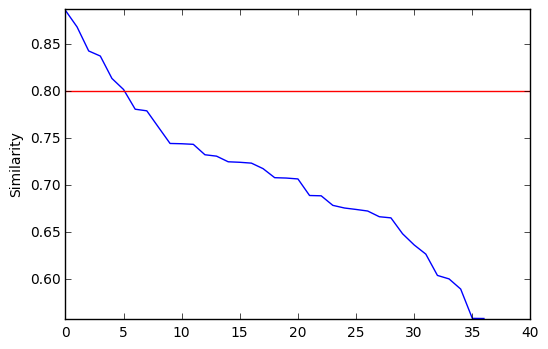

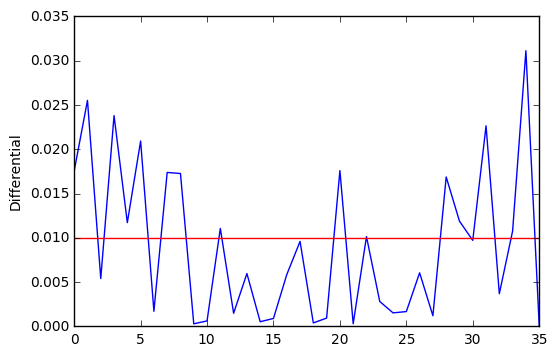

None
------------------------------------------------------------
12
     cluster  cnt   portion  in_threshold  in_ratio      time_mean  \
428     1253   14  0.005696             4  0.285714  385157.686191   

           time_v  distance  variance  similarity  cohesion  
428  8.433276e+09  3.413354  0.243811    0.700717    0.4677  



0.956184983253 1377 ‘굿판 논란‘ 박승주 안전처장관 후보자 자진 사퇴
0.911227583885 1309 [박근혜·최순실 게이트]박승주 내정자 자진 사퇴
0.896108090878 1256 ‘굿판·전생 체험’ 박승주 안전처 장관 내정자 자진 사퇴
0.859841108322 1266 ‘전생 체험’ 박승주, 국민안전처 장관 후보자 자진사퇴
0.74661642313 1253 [속보] 박승주 안전처 장관 내정자, 자진 사퇴
0.694596946239 1521 [동영상 뉴스]더민주, 문화예술계 블랙리스트 작성 주도 ‘조윤선 장관 사퇴’ 촉구
0.66801148653 1085 [동영상 뉴스]한자리에 모인 야3당 대표…정국 수습책 논의
0.652526497841 2327 청와대 "대통령, 국민 목소리 무거운 마음으로 듣고 상황 엄중함 깊이 인식"
0.621694803238 594 [속보]“박근혜 대통령과 정세균 국회의장 오늘 오전 10시30분 국회서 전격 회동 예정”
0.610829412937 521 한중일 美대사 한자리에
0.566431462765 636 [영상] 박대통령 코앞에서 야당 의원들 ‘하야’ 피켓시위
0.55330568552 630 박 대통령-정세균 국회의장 회동 13분만에 끝
0.540658116341 598 박 대통령 오전 국회 방문, 정세균 의장 

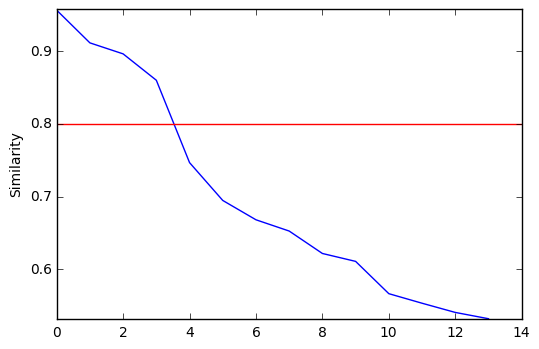

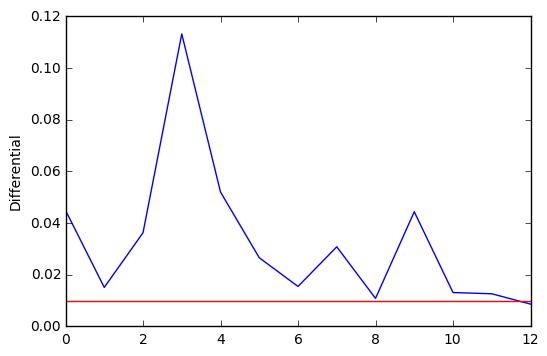

None
------------------------------------------------------------
13
    cluster  cnt   portion  in_threshold  in_ratio      time_mean  \
22      733   35  0.014239             2  0.057143  186644.171905   

          time_v  distance  variance  similarity  cohesion  
22  2.484640e+08  9.126037  0.260744    0.677176  0.211318  



0.935679078102 2252 [영상] 광화문 찾은 랩퍼 조피디가 부르는 ‘친구여’
0.87297475338 2254 [동영상 뉴스][11·12민중총궐기]광화문 수놓은 100만여 개의 촛불 물결
0.788166046143 2197 [11·12 민중총궐기]고층빌딩에서 본 시간대별 현장 사진
0.752432048321 2230 [11·12 민중총궐기]박근혜 퇴진! 촛불 100만의 현장
0.747974336147 2248 [11·12 민중총궐기]경복궁 동편 삼청동 방향 동십자각 앞도 시민·경찰 대치
0.73789614439 2200 [11·12 민중총궐기]행진 합법인데···경, 청와대 주변에 2중3중 차벽 봉쇄
0.736993730068 2210 “박근혜 퇴진” 65만 인파 광장 집결
0.726222038269 2190 “박근혜 퇴진” 벌써부터 시민 물결 가득…경찰 추산 11만명 돌파
0.724545776844 2167 [속보][11·12 민중총궐기]법원, 청와대 인근까지 행진 전면 허용
0.722272396088 2226 [속보][11·12 민중총궐기]주최측 "촛불시민 100만 돌파했다"
0.722169458866 2188 “박근혜 퇴진” 벌써부터 시민 물결 가득…경찰 추산 11만명 돌파
0.71143335104 2220 100만 함성…87년 ‘이한열 장례식’ 이후 최대 인

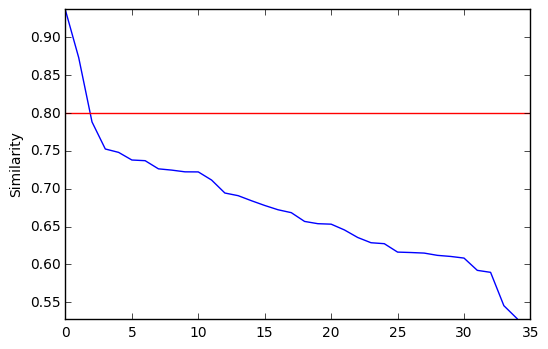

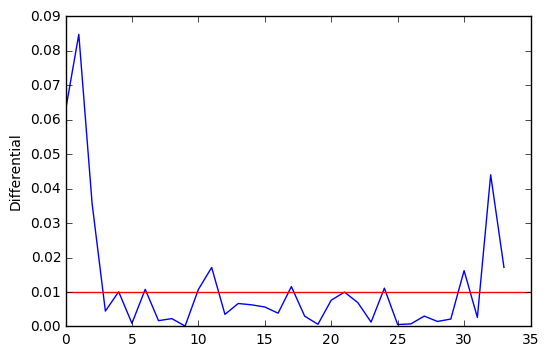

None
------------------------------------------------------------
14
     cluster  cnt   portion  in_threshold  in_ratio      time_mean  \
378     1725   36  0.014646             3  0.083333  326205.487778   

           time_v  distance  variance  similarity  cohesion  
378  2.000996e+09  9.883514  0.274542     0.64138  0.285132  



0.958744525909 1847 엘시티 이영복 “성실히 조사받겠다”···부산구치소 수감
0.869823932648 2017 20년 전엔 입 닫은 이영복, 이번엔 ‘로비장부’ 입 열까
0.800736069679 2278 부산 해운대 엘시티 이영복 회장 구속
0.792817533016 1931 검찰, ‘엘시티’ 수사 본격화…이영복 회장 검거
0.788744211197 1726 ‘수백억 횡령’ 부산 엘시티 이영복 회장 검거
0.77051204443 2275 해운대 엘시티 이영복 구속…검찰, 비자금 규모 등 집중 조사
0.759590446949 1743 ‘비자금 의혹’ 엘시티 이영복 회장 체포
0.740363478661 1708 해운대 ‘엘시티’ 이영복 회장 체포
0.73302924633 2047 검찰, ‘엘시티’ 이영복 회장 영장 청구…횡령·사기 혐의
0.679777681828 749 엘시티 분양대행사 대표 구속···횡령·주택법 위반 혐의
0.671247243881 2048 ‘최순실 게이트’ 핵심인물 차은택 구속
0.652643799782 1725 [속보] ‘차은택 은사’ 송성각 전 콘텐츠진흥원장 영장 발부
0.646019518375 1733 [속보]‘최순실 게이트’ 송성각 전 콘텐츠진흥원장 구속
0.629453957081 1127 검찰, ‘문고리 3인방’ 이재만·안봉근

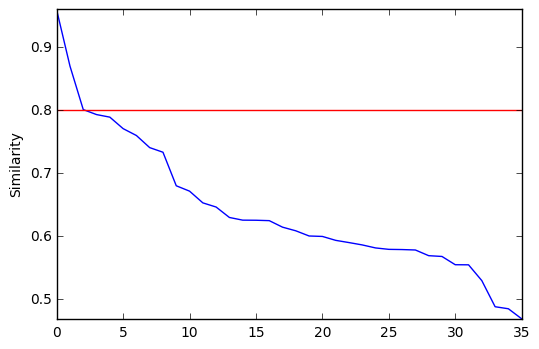

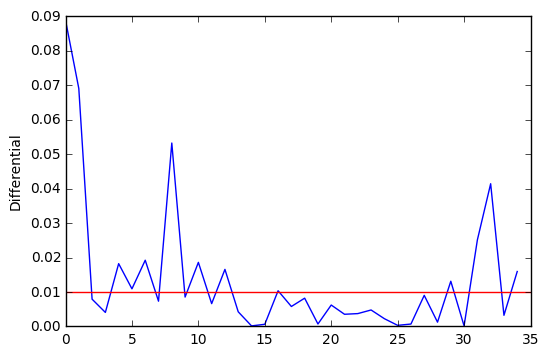

None
------------------------------------------------------------


In [10]:
sc.print_clusters(top=15, sortby='similarity')

In [11]:
cdf = pd.DataFrame(calced_clusters, columns=['cluster', 'portion', 'deltaTime', 'cohesion', 'ntc'])
sort_cdf = cdf.sort_values('ntc', ascending=False)
sort_cdf

,cluster,portion,deltaTime,cohesion,ntc
12,1114022,0.120275,0.310189,0.677176,39.130416
6,1114009,0.103093,0.438058,0.733423,30.265336
5,1114002,0.054983,0.481484,0.750420,28.328288
0,1114107,0.041237,0.563553,0.798137,25.767178
1,1114498,0.051546,0.571741,0.783418,25.376169
10,1114117,0.127148,0.592448,0.711145,24.117714
9,1114263,0.061856,0.594122,0.712666,24.020063
13,1114378,0.123711,0.622660,0.641380,22.597648
3,1114121,0.041237,0.756752,0.770285,20.958463
4,1114037,0.054983,0.758083,0.767194,20.918083


In [12]:
for idx, row in sort_cdf.iterrows():
    for c in calced_clusters:
        if(c['cluster'] == row.cluster):
            print c['ntc'], c['leading']['title']

39.130416429 경찰·시위대, 충돌 대신 협력
30.2653362149 거리民心 본 野 "루비콘강 갈 것"
28.3282882158 서해와 인천대교 거실에서 한눈에…최고 38층 3100세대 송도의 새 랜드마크로
25.7671780906 7일 비에 젖은 입동… 8일부터 다시 쌀쌀
25.3761689333 이 와중에…국방부, ‘한일 군사협정’ 2차 협상도 강행
24.1177142463 美 누가 이겨도 ‘보호무역’… 트럼프 당선땐 브렉시트급 충격
24.0200631015 주한미군 ‘미 민간인 항공편으로 일본 대피훈련 7년 만에 실시’
22.5976482465 ‘최순실 의혹’ 수사 검찰, 뇌물·강요혐의로 송성각 전 콘텐츠진흥원장 체포
20.958462923 “박상진 삼성전자 사장, 獨서 최순실 만나 자금지원 논의”
20.9180831444 끼어들기 피하다 '쿵'… 주말 산행길의 비극
20.4344911499 한중일 美대사 한자리에
20.2055051407 현지 친구와 지내며 영어 몰입… 말하기 능력·자신감 얻어
19.2420957266 2016 미국 대선 막올랐다
18.7586408758 민심 청취 나선 박 대통령, ‘세월호 망언’ 목사 만났다
